In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
import glob
from math import sqrt
SPINE_COLOR = 'gray'

In [2]:
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'pdf',
              'text.latex.preamble': ['\\usepackage{gensymb}'],
              'axes.labelsize': 8, # fontsize for x and y labels (was 10)
              'axes.titlesize': 8,
              'font.size': 8,       #'text.fontsize': 8, # was 10
              'legend.fontsize': 6.5, # was 10
              'xtick.labelsize': 8,
              'ytick.labelsize': 8,
              'lines.linewidth' : 0.4,
              'lines.markersize' : 0.4,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

linewidth=497
DPI=96
#latexify(fig_width=linewidth/DPI, fig_height=int(linewidth/2.3/DPI))
latexify(fig_width=linewidth/DPI/1.7, fig_height=int(linewidth/2.3/DPI))

5366.797468354431 7585.2531645569625


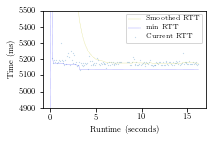

In [39]:
#rtt values over time
for f in glob.iglob('./*2*/*1453*/firstKPIs', recursive=True): # /*directoryRegExp*/ to reduce output (long runtime)
    df = pd.read_csv(f, delim_whitespace=True ,names = ['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 
                                                        'rtt_min', 'current_rtt', 'srtt', 'rtt_var'])
    #df.current_rtt = df.current_rtt.apply(lambda x: x / 1000) #from us to ms
    #df.srtt = df.srtt.apply(lambda x: x / 1000)
    #df.rtt_min = df.rtt_min.apply(lambda x: x / 1000)
    title=f
    
    print(df.current_rtt.mean(),
          df.srtt.mean())
    
    
    fig = df.plot(x="seconds_offset", y="current_rtt", kind='scatter', s=0.01)
    x = df.seconds_offset
    y1 = df.srtt
    fig.plot(x,y1,'y:') # more examples = 'b:' 'k:' 'r--'
    y2 = df.rtt_min
    fig.plot(x,y2, 'b:')

    axes = plt.gca()
    axes.set_ylim([4900,5500])
    #axes.set_xlim([-5,605])
    fig.legend(['Smoothed RTT', 'min RTT', 'Current RTT'])
    fig.set_xlabel('Runtime (seconds)')
    lines = fig.set_ylabel('Time (ms)')
    plt.tight_layout()
    plt.savefig(f+"_timing.pdf")